# FBRESNET - one example

In [12]:
# Import Packages
import numpy as np
from torch.autograd import Variable
from tqdm import tqdm
import torch
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

In [13]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "True"

In [14]:
# Import local model files
from FBRN.myfunc import Physics
from FBRN.myfunc import MyMatmul
from FBRN.main import FBRestNet
from FBRN.model import MyModel
from FBRN.myfunc import Export_hyper

### Initialisation
The condition are as follows:
$a=1$ ,
$p=1$ ,
the constraint is $0 <x_i <1$ .

In [15]:
#exp1 = FBRestNet(experimentation=Physics(2000,50,1,1), nb_blocks=20, noise = 0.05,folder = './../', im_set="Set1",batch_size=[600,1],lr=1e-3, nb_epochs=[30,1],save=True)
exp1 = FBRestNet(experimentation=Physics(2000,50,1,1), nb_blocks=20, noise = 0.05,folder = './../', im_set="Set1",batch_size=[100,1],lr=1e-3, nb_epochs=[50,1],save=True)


### Dataset

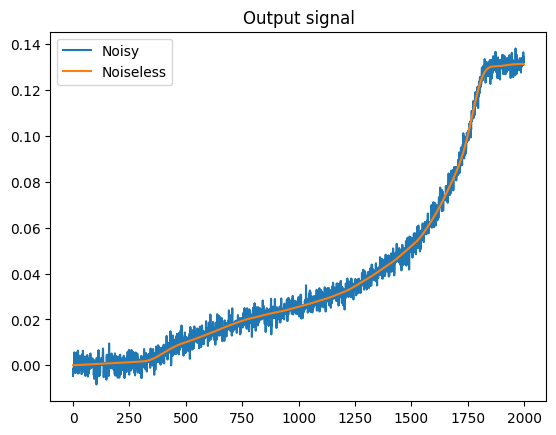

In [16]:
train_set, val_set = exp1.CreateDataSet()

### Trainings
The training is done over 20 epochs, learning rate is $10^{-3}$.
The Lipschitz constant is plot duroing training.
Here the parameter can be saved after training in file 'Trainings', and uploaded later. (1 hour)

epoch :  0  -----  validation :  0.000143571
    ----- initial error :  0.000921394
epoch :  1  -----  validation :  0.000140293
    ----- initial error :  0.000921394
epoch :  2  -----  validation :  0.000136749
    ----- initial error :  0.000921394
epoch :  3  -----  validation :  0.0001336
    ----- initial error :  0.000921394
epoch :  4  -----  validation :  0.000130732
    ----- initial error :  0.000921394
epoch :  5  -----  validation :  0.000127914
    ----- initial error :  0.000921394
epoch :  6  -----  validation :  0.000124956
    ----- initial error :  0.000921394
epoch :  7  -----  validation :  0.000121901
    ----- initial error :  0.000921394
epoch :  8  -----  validation :  0.000119097
    ----- initial error :  0.000921394
epoch :  9  -----  validation :  0.000116492
    ----- initial error :  0.000921394
epoch :  10  -----  validation :  0.000114133
    ----- initial error :  0.000921394
epoch :  11  -----  validation :  0.000112178
    ----- initial error :  0.00

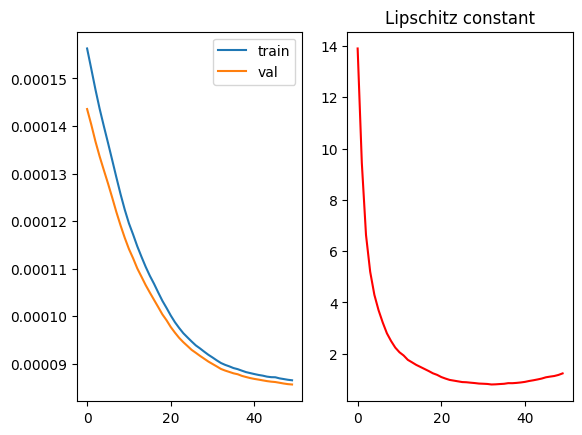

Final Lipschitz constant =  1.233039582705809


In [17]:
exp1.train(train_set,val_set,save_model=False)

### Save the model

In [18]:
model_save_path = '../Trainings/'
trained_model = 'model_example_a_1_r_1.pt'
#torch.save(exp1.state_dict(), model_save_path+trained_model)

### Load the model

In [8]:
exp1.load_state_dict(torch.load(model_save_path+trained_model))

<All keys matched successfully>

### Testing
We computre the averaged error over the testing set, and compute one example, on the left the signal are projected on the eigenbasis of operator $T_a^TT_a$, on the right on the finite element basis.

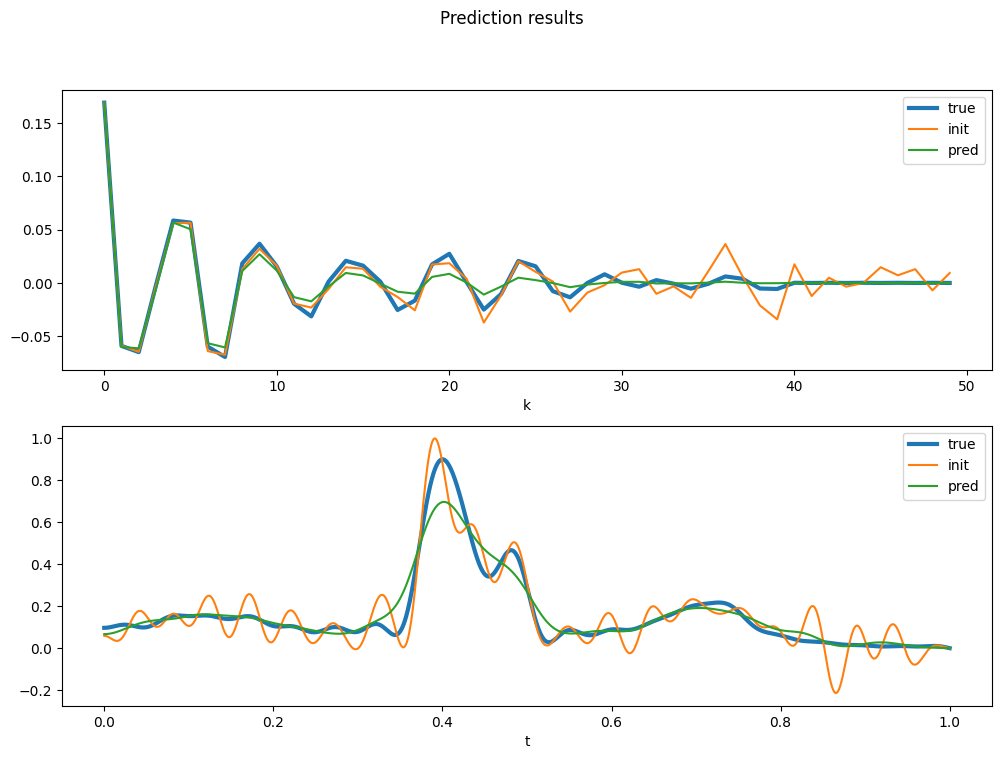

Erreur de sortie :  0.013208436933554354
Erreur initiale :  0.1146716863888814
Finite element basis error: 0.044904417307366405
Finite element basis init error: 0.08432757121790133


In [19]:
average_error = exp1.test(val_set)

### Test on a Gaussian function

<class 'str'>


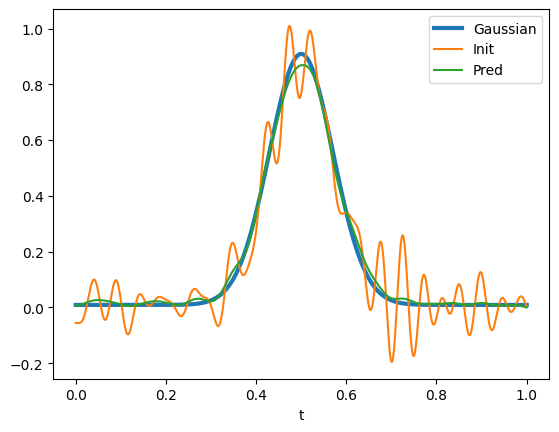

|x-xp|/|x| =  0.00249353079834024


In [20]:
exp1.test_gauss()

### Lipschitz constant

Here we implement for the Gaussian signal the lipschitz constant of the neural network, depending on the input. s or if 

$x_{in}=x_{bias}=T_a^T y^\delta$ 

In [21]:
exp1.model.Lipschitz(opt1="semi",opt2="entree11")

0.3472412849791102

$x_{in}= 0$, and $x_{bias}= T_a^T y^\delta$ 

In [22]:
exp1.model.Lipschitz(opt1="semi",opt2="entree01")

0.18939749084741228

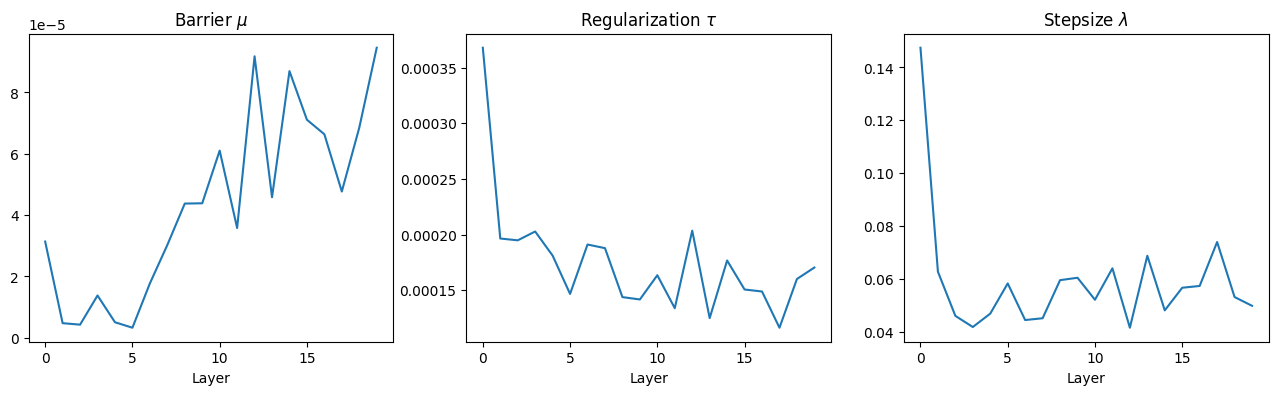

In [23]:
mu_vec = [np.squeeze(exp1.model.Layers[layer_id].mu).item() for layer_id in range(20)]
tau_vec = [np.squeeze(exp1.model.Layers[layer_id].gamma_reg[1]).item() for layer_id in range(20)]
lambda_vec = [np.squeeze(exp1.model.Layers[layer_id].gamma_reg[0]).item() for layer_id in range(20)]

im, ax = plt.subplots(1,3, figsize=(16,4))

ax[0].plot(mu_vec)
ax[0].set_xlabel('Layer')
ax[0].set_title(r'Barrier $\mu$')

ax[1].plot(tau_vec)
ax[1].set_xlabel('Layer')
ax[1].set_title(r'Regularization $\tau$')

ax[2].plot(lambda_vec)
ax[2].set_xlabel('Layer')
ax[2].set_title(r'Stepsize $\lambda$')
plt.show()


In [24]:
hyper_params = np.load('../Datasets/data/hyp_params2000_50_1_1.npy', allow_pickle=True)

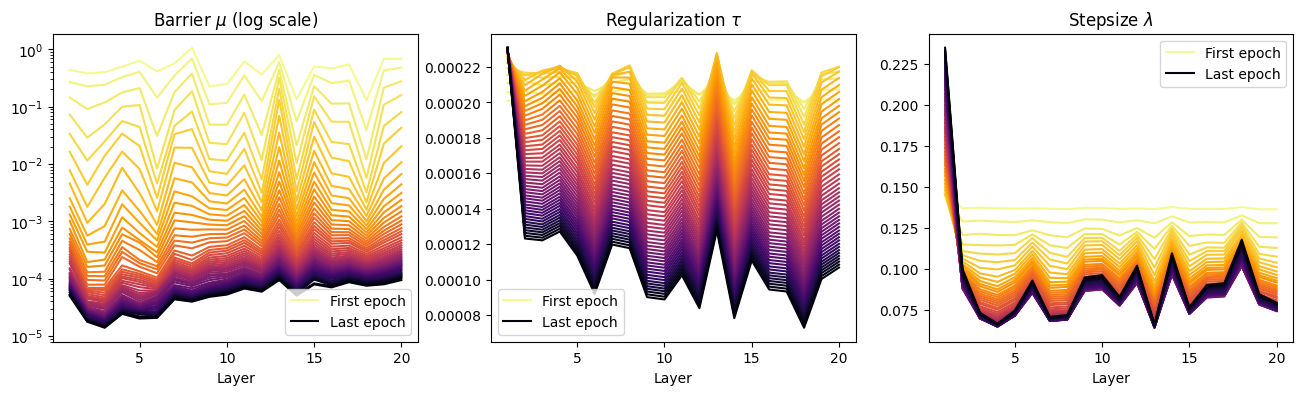

In [25]:
im, ax = plt.subplots(1,3, figsize=(16,4))
for i in range(exp1.nb_epochs):

    ax[0].plot(np.arange(1, exp1.nb_blocks+1),hyper_params[i,0], color=sns.color_palette('inferno',n_colors=exp1.nb_epochs)[exp1.nb_epochs-i-1],
        label='First epoch' if i==0 else 'Last epoch' if i==(exp1.nb_epochs-1) else '_hide')
    ax[0].set_yscale('log')
    ax[0].set_xlabel('Layer')
    ax[0].set_title(r'Barrier $\mu$ (log scale)')

    ax[1].plot(np.arange(1, exp1.nb_blocks+1),hyper_params[i,1], color=sns.color_palette('inferno',n_colors=exp1.nb_epochs)[exp1.nb_epochs-i-1],
        label='First epoch' if i==0 else 'Last epoch' if i==(exp1.nb_epochs-1) else '_hide')
    ax[1].set_xlabel('Layer')
    ax[1].set_title(r'Regularization $\tau$')

    ax[2].plot(np.arange(1, exp1.nb_blocks+1),hyper_params[i,2], color=sns.color_palette('inferno',n_colors=exp1.nb_epochs)[exp1.nb_epochs-i-1],
        label='First epoch' if i==0 else 'Last epoch' if i==(exp1.nb_epochs-1) else '_hide')
    ax[2].set_xlabel('Layer')
    ax[2].set_title(r'Stepsize $\lambda$')

for i in range(3): ax[i].legend()
plt.show()

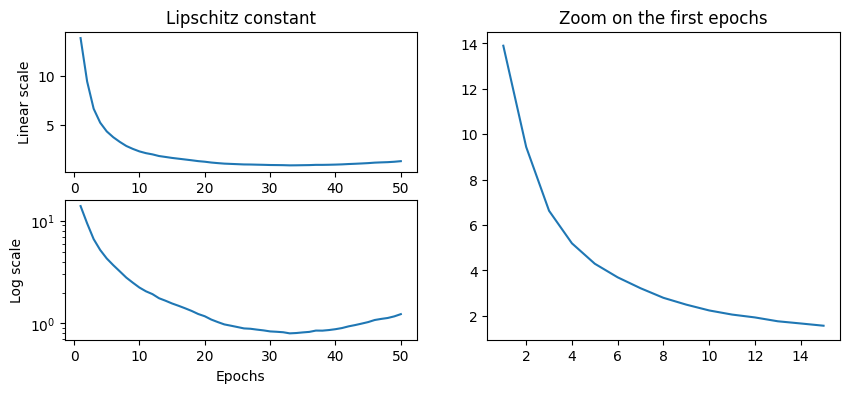

In [26]:
lip_cte = np.loadtxt('../Datasets/data/lip2000_50_1_1.txt')

fig = plt.figure(figsize=(10,4))

ax = fig.add_subplot(2,2,1)
ax.plot(lip_cte[:,0]+1, lip_cte[:,1])
ax.set_ylabel('Linear scale')
ax.set_title('Lipschitz constant')
#ax.set_xticks(np.arange(1,exp1.nb_epochs+1,3))

ax = fig.add_subplot(2,2,3)
ax.plot(lip_cte[:,0]+1, lip_cte[:,1])
ax.set_xlabel('Epochs')
ax.set_ylabel('Log scale')
ax.set_yscale('log')
#ax.set_xticks(np.arange(1,exp1.nb_epochs+1,3))

ax = fig.add_subplot(2,2,(2,4))
ax.plot(lip_cte[:15,0]+1, lip_cte[:15,1])
ax.set_title('Zoom on the first epochs')
#ax.set_xticks(np.arange(1,16,3))

plt.show()

In [27]:
# im, ax = plt.subplots(exp1.nb_epochs,3, figsize=(18,80))

# for i in range(exp1.nb_epochs):
#     ax[i][0].plot(hyper_params[i,0])
#     ax[i][0].set_xlabel('Layer')
#     ax[i][0].set_title(r'Barrier $\mu$')

#     ax[i][1].plot(hyper_params[i,1])
#     ax[i][1].set_xlabel('Layer')
#     ax[i][1].set_title(r'Regularization $\tau$')

#     ax[i][2].plot(hyper_params[i,2])
#     ax[i][2].set_xlabel('Layer')
#     ax[i][2].set_title(r'Stepsize $\lambda$')
# plt.show()